In [609]:

import pandas as pd
import seaborn as sns
import numpy as np
from pylab import plot, show, rcParams, legend, bar, barh, xlabel, ylabel, title, xticks, yticks, axhline
from pandas import set_option, DataFrame
set_option("display.max_rows", 5)
import matplotlib.pyplot as plt




In [610]:
salaries = pd.read_csv("input/Salaries.csv", dtype='unicode')

In [611]:
salaries.shape

(148654, 13)

### Start analysing columns data

In [612]:
salaries.ix[salaries.EmployeeName=='Not provided']

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148646,148647,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,NaN,San Francisco,NaN
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,NaN,San Francisco,NaN


There are 4 lines that do not bring any useful information, so drop it

In [613]:
salaries = salaries.ix[salaries.EmployeeName!='Not provided']

In [614]:
for columns in salaries.columns:
    if len(salaries[columns].unique())<10:
        print('Unique values for column ' + columns + ': ' + str(list(salaries[columns].unique())))

Unique values for column Year: ['2011', '2012', '2013', '2014']
Unique values for column Notes: [nan]
Unique values for column Agency: ['San Francisco']
Unique values for column Status: [nan, 'PT', 'FT']


Notes is null, so drop it

In [615]:
del salaries['Notes']

Agency is constant=='San Francisco', so drop it

In [616]:
del salaries['Agency']

In [617]:
basepay = salaries.ix[:,['Year', 'BasePay']]

In [618]:
basepay.shape

(148650, 2)

In [619]:
basepay.BasePay = basepay.BasePay.astype(float)

In [620]:
basepay

,Year,BasePay
0,2011,167411.18
1,2011,155966.02
...,...,...
148649,2014,0.00
148653,2014,0.00


In [621]:
basepay = DataFrame(basepay.groupby(by=['Year']).mean()).reset_index()


In [622]:
basepay

,Year,BasePay
0,2011,63595.956517
1,2012,65436.406857
2,2013,69630.030216
3,2014,66564.421924


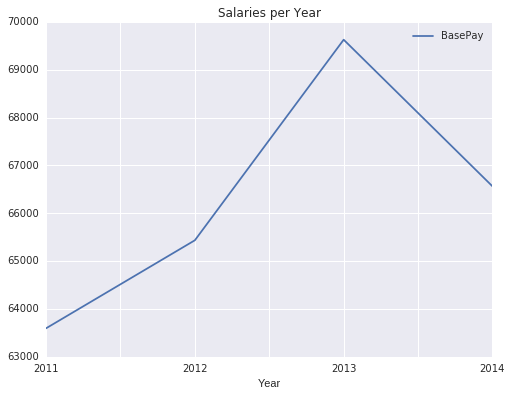

In [623]:
basepay.plot(x = 'Year', figsize=[8,6], legend=True, title="Salaries per Year")

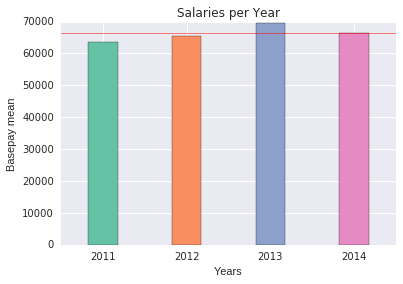

In [624]:
ind = np.arange(4)
width = 0.35
bar(ind, basepay.BasePay.unique().astype(int), width, color=sns.color_palette("Set2", 4), align='center')
xlabel('Years')
ylabel('Basepay mean')
title('Salaries per Year')
xticks(ind  , basepay.Year.unique())

axhline(basepay.BasePay.mean(), color='red', linewidth=0.5) #Mean


Considering all salaries, we can see that in 2014, their mean decreased

In [625]:
JobTitle = DataFrame(salaries['JobTitle'].value_counts())

In [626]:
JobTitle.reset_index(inplace=True)

In [627]:
JobTitle.columns=['JobTitle', 'CountTitle']

In [628]:
JobTitle

,JobTitle,CountTitle
0,Transit Operator,7036
1,Special Nurse,4389
...,...,...
2156,"TRACK MAINTENANCE SUPERINTENDENT,MUNICIPAL RAI...",1
2157,CHIEF ELECTRICAL INSPECTOR,1


### Added count of job title to be able to filter the most common/uncommon titles

In [629]:
salaries = salaries.merge(JobTitle, how='left', on='JobTitle')

In [630]:
salaries.TotalPayBenefits = salaries.TotalPayBenefits.astype(float)

In [631]:
salaries[salaries['TotalPayBenefits']==0.00]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Status,CountTitle
36156,36157,PAULETTE ADAMS,"STATIONARY ENGINEER, WATER TREATMENT PLANT",0.0,0.0,0.0,NaN,0.0,0.0,2011,NaN,47
36157,36158,KAUKAB MOHSIN,TRANSIT OPERATOR,0.0,0.0,0.0,NaN,0.0,0.0,2011,NaN,2388
...,...,...,...,...,...,...,...,...,...,...,...,...
148647,148649,Leon Walker,Custodian,0.00,0.00,0.00,0.00,0.0,0.0,2014,PT,2418
148648,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.0,0.0,2014,PT,2418


### Clean TotalPayBenefits == 0, because they do not show any useful information

In [632]:
salaries = salaries.ix[salaries.TotalPayBenefits != 0.00]

In [633]:
salaries[salaries['TotalPayBenefits']<0.00]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Status,CountTitle
110528,110529,Timothy E Gibson,Police Officer 3,NaN,0.0,0.0,-2.73,0.0,-2.73,2013,NaN,2421
110529,110530,Mark E Laherty,Police Officer 3,NaN,0.0,0.0,-8.2,0.0,-8.20,2013,NaN,2421
110530,110531,David P Kucia,Police Officer 3,NaN,0.0,0.0,-33.89,0.0,-33.89,2013,NaN,2421
148649,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.00,0.00,-618.13,0.00,-618.13,-618.13,2014,PT,63


### There are 4 workers with TotalPayBenefits < 0 . At this moment I see no use for them, so I will keep them separated from the rest of the dataset in a dataframe named negatives

In [634]:
negatives = salaries[salaries['TotalPayBenefits']<0.00]

In [635]:
salaries = salaries[salaries['TotalPayBenefits']>0.00]

In [636]:
salaries_by_title = salaries.ix[salaries.CountTitle>1000, ['Year', 'JobTitle', 'TotalPayBenefits']]
salaries_by_title = DataFrame(salaries_by_title.groupby(by=['JobTitle', 'Year']).mean()).reset_index() 

### Only 3 titles have salaries in 2011

In [637]:
salaries_by_title[salaries_by_title.Year=='2011']

,JobTitle,Year,TotalPayBenefits
36,REGISTERED NURSE,2011,106621.140689
43,SPECIAL NURSE,2011,31325.075942
50,TRANSIT OPERATOR,2011,61768.502560


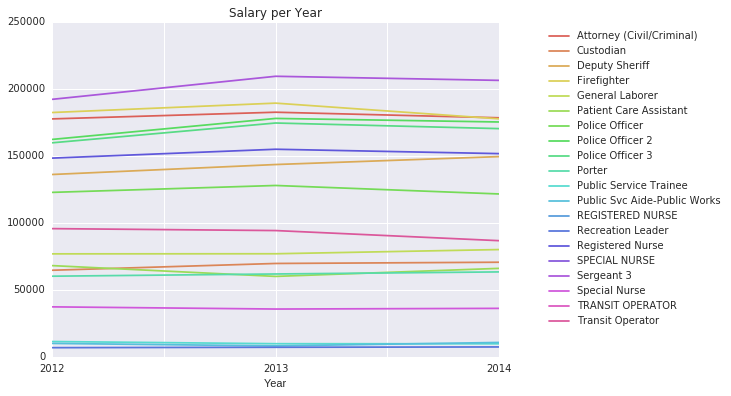

In [638]:
fig = plt.figure()
ax = plt.subplot(111)
color=iter(sns.color_palette("hls", 21))



for titles in salaries_by_title['JobTitle'].unique():
    c=next(color)
    salaries_by_title.ix[salaries_by_title['JobTitle']==titles].sort_values(by='Year')\
    .plot(x = 'Year', y= 'TotalPayBenefits', figsize=[8,6], legend=True, title="Salary per Year", label=titles, \
          ax=ax, c=c)
    
    # Shrink current axis by 20%
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Put a legend to the right of the current axis
    #plt.legend(loc='center left', bbox_to_anchor=(200, 0.5))
    plt.legend(bbox_to_anchor=(1.3, 0.9), bbox_transform=plt.gcf().transFigure)
    #legend(loc='upper left', bbox_to_anchor=(0.5, 1.05))

### The graphic above does not show any relevant information, so let´s change the strategy

In [639]:
pivot = salaries.ix[:, ['Year', 'JobTitle', 'TotalPayBenefits']]
pivot = DataFrame(pivot.groupby(by=['JobTitle', 'Year']).mean()).reset_index() 
pivot = pivot.pivot( 'JobTitle', 'Year', 'TotalPayBenefits').reset_index()

In [640]:
pivot.columns=['JobTitle', 'Year2011', 'Year2012', 'Year2013', 'Year2014']

### Let's take a look at JobPositions with totalPayBenefits != 0 in 2011

In [641]:
pivot_2011 = pivot[pivot.Year2011.notnull()]
print('Titles with 2011 not null and 2012 null: '+ str(pivot_2011[pivot_2011.Year2012.notnull()].shape[0]))
print('Titles with 2011 not null and 2013 null: '+ str(pivot_2011[pivot_2011.Year2013.notnull()].shape[0]))
print('Titles with 2011 not null and 2014 null: '+ str(pivot_2011[pivot_2011.Year2014.notnull()].shape[0]))

Titles with 2011 not null and 2012 null: 0
Titles with 2011 not null and 2013 null: 0
Titles with 2011 not null and 2014 null: 0


### Based on the analysis above we can conclude that everyone that has salary in 2011 do not have any entry in the other years, so for salary increase by year they are not relevant

In [642]:
#Free some memory
del(pivot_2011)
#discard JobTitles that have salary in 2011
pivot = pivot[pivot.Year2011.isnull()]
#drop 2011 year coluumn
pivot.drop('Year2011', axis=1, inplace=True)

In [643]:
pivot

,JobTitle,Year2012,Year2013,Year2014
3,"ACPO,JuvP, Juv Prob (SFERS)",NaN,NaN,80266.370000
50,ASR Senior Office Specialist,87848.418824,94691.889524,87522.792727
...,...,...,...,...
2154,X-Ray Laboratory Aide,75778.306774,64605.606176,68754.120000
2156,Youth Comm Advisor,85774.390000,51344.310000,52011.190000


### Let's take a look at 2013 salary increase by title

In [644]:
# fill na with -9999
pivot.fillna(value=-9999, inplace=True)
for jobtitle in pivot['JobTitle']:
    sal2012 = pivot.ix[pivot['JobTitle']==jobtitle, 'Year2012'].values[0]
    sal2013 = pivot.ix[pivot['JobTitle']==jobtitle, 'Year2013'].values[0]
    if ((sal2012!=-9999) & (sal2013!=-9999)):
        pivot.ix[pivot['JobTitle']==jobtitle, 'Increase2013'] = (((sal2013-sal2012)*100)/sal2012)

### Let´s create a DF with the top 5 best and top 5 worst salaries increase in 2013

In [645]:
bestworst2013 = pivot.ix[pivot['Increase2013'].notnull()].sort_values('Increase2013').head(5)
bestworst2013 = pd.concat([bestworst2013, pivot.ix[pivot['Increase2013'].notnull()].sort_values('Increase2013').tail(5)])

([<matplotlib.axis.YTick at 0x7f614fd76198>,
 <a list of 10 Text yticklabel objects>)

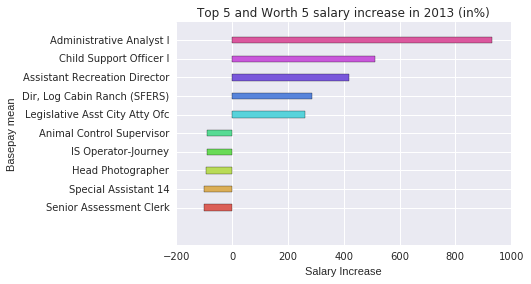

In [646]:
ind = np.arange(10)
height = 0.35
barh(ind, bestworst2013.Increase2013, height, color=sns.color_palette("hls", 10), align='center')
xlabel('Salary Increase')
ylabel('Basepay mean')
title('Top 5 and Worth 5 salary increase in 2013 (in%)')
yticks(ind , bestworst2013.JobTitle)

### Let's take a look at 2014 salary increase by title

In [647]:
for jobtitle in pivot['JobTitle']:
    sal2013 = pivot.ix[pivot['JobTitle']==jobtitle, 'Year2013'].values[0]
    sal2014 = pivot.ix[pivot['JobTitle']==jobtitle, 'Year2014'].values[0]
    if ((sal2013!=-9999) & (sal2014!=-9999)):
        pivot.ix[pivot['JobTitle']==jobtitle, 'Increase2014'] = (((sal2014-sal2013)*100)/sal2013)

### Let's create a DF with the top 5 best and top 5 worst salaries increase in 2014

In [648]:
bestworst2014 = pivot.ix[pivot['Increase2014'].notnull()].sort_values('Increase2014').head(5)
bestworst2014 = pd.concat([bestworst2014, pivot.ix[pivot['Increase2014'].notnull()].sort_values('Increase2014').tail(5)])

([<matplotlib.axis.YTick at 0x7f61544520f0>,
 <a list of 10 Text yticklabel objects>)

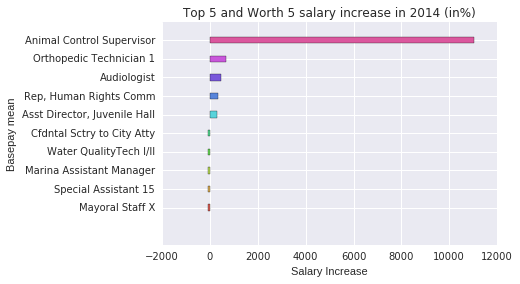

In [649]:
#ind = np.arange(10)
#height = 0.35
barh(ind, bestworst2014.Increase2014, height, color=sns.color_palette("hls", 10), align='center')
xlabel('Salary Increase')
ylabel('Basepay mean')
title('Top 5 and Worth 5 salary increase in 2014 (in%)')
yticks(ind , bestworst2014.JobTitle)

### Looks like Animal Control Supervisor is a outlier or a mistake. Let´s investigate

In [650]:
salaries.ix[salaries.JobTitle=="Animal Control Supervisor"]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Status,CountTitle
68999,69000,Kent Cunningham,Animal Control Supervisor,6627.0,0.0,0.0,3279.22,6627.0,9906.22,2012,NaN,3
109811,109812,Kent A Cunningham,Animal Control Supervisor,662.7,0.0,25.4,294.41,688.1,982.51,2013,NaN,3
127013,127014,Denise J Bon Giovanni,Animal Control Supervisor,64701.00,1418.16,15232.55,28242.50,81351.71,109594.21,2014,FT,3


JobTitle Animal Control Supervisor has 3 entries, 1 per year and there is a big diference between the years because it is related to 3 different professionals. If we look a bit closer at Kent A Cunningham and Kent Cunningham, they look like the same person, but the BasePay in 2013 seems to have a problem in the decimal indicator. It´s 662.7 instead of 6627. The same analysis can bem made on Benefits. Apart from that, if we look at 2014 data, the values are 10x bigger than 2012. Denise J Bon Giovanni looks like an outlier. At this moment, let's eliminate this case and look at the results

In [651]:
pivot.drop('Increase2014', axis=1, inplace=True)
for jobtitle in pivot.ix[pivot.JobTitle != 'Animal Control Supervisor', 'JobTitle']:
    sal2013 = pivot.ix[pivot['JobTitle']==jobtitle, 'Year2013'].values[0]
    sal2014 = pivot.ix[pivot['JobTitle']==jobtitle, 'Year2014'].values[0]
    if ((sal2013!=-9999) & (sal2014!= -9999)):
        pivot.ix[pivot['JobTitle']==jobtitle, 'Increase2014'] = (((sal2014-sal2013)*100)/sal2013)

In [652]:
bestworst2014 = pivot.ix[pivot['Increase2014'].notnull()].sort_values('Increase2014').head(5)
bestworst2014 = pd.concat([bestworst2014, pivot.ix[pivot['Increase2014'].notnull()].sort_values('Increase2014').tail(5)])

([<matplotlib.axis.YTick at 0x7f614f3c8c50>,
 <a list of 10 Text yticklabel objects>)

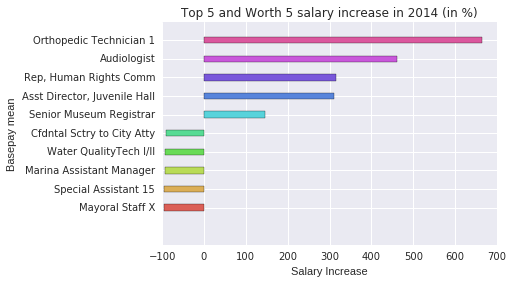

In [653]:
barh(ind, bestworst2014.Increase2014, height, color=sns.color_palette("hls", 10), align='center')
xlabel('Salary Increase')
ylabel('Basepay mean')
title('Top 5 and Worth 5 salary increase in 2014 (in %)')
yticks(ind , bestworst2014.JobTitle)

### The above graphic looks much better than the previous graphic for 2014

### Now, lets look at the frequency that thos jobs appear in our dataset

In [654]:
for jobtitle in bestworst2013.JobTitle:
    bestworst2013.ix[bestworst2013.JobTitle==jobtitle, 'CountTitle'] = \
    salaries.ix[salaries.JobTitle==jobtitle, 'CountTitle'].unique()
bestworst2013

,JobTitle,Year2012,Year2013,Year2014,Increase2013,CountTitle
1799,Senior Assessment Clerk,39149.185,20.730,-9999.0,-99.947049,3.0
1891,Special Assistant 14,36873.140,26.600,-9999.0,-99.927861,3.0
...,...,...,...,...,...,...
477,Child Support Officer I,9401.740,57454.305,-9999.0,511.102892,8.0
128,Administrative Analyst I,5907.330,60862.230,-9999.0,930.283224,2.0


In [655]:
for jobtitle in bestworst2014.JobTitle:
    bestworst2014.ix[bestworst2014.JobTitle==jobtitle, 'CountTitle'] = \
    salaries.ix[salaries.JobTitle==jobtitle, 'CountTitle'].unique()
bestworst2014

,JobTitle,Year2012,Year2013,Year2014,Increase2013,Increase2014,CountTitle
1220,Mayoral Staff X,103382.35,113508.140,4294.13,9.794506,-96.216897,4.0
1892,Special Assistant 15,152565.41,110888.760,5650.86,-27.317234,-94.904028,3.0
...,...,...,...,...,...,...,...
223,Audiologist,143247.78,22151.445,124333.97,-84.536273,461.290561,4.0
1297,Orthopedic Technician 1,15897.47,11631.370,88804.13,-26.835088,663.488136,3.0


By looking at the above dataframes and considering that we have more than 100k entries in the original dataset, the amount of data beeing considered in our analysis is not that big. As we don't know if the few entries for those jobtitles mean insignificant data or jobtitles rarity, we will continue the analysis

### Now let's look if some title is part from the best/worst 2013/2014 samples

In [656]:
best20132014 = pd.merge(bestworst2013, bestworst2014, how='inner', on='JobTitle')

In [657]:
best20132014.shape[0]

0

based on the above analysis there is no Jobtitlein the top/worst 5 that appears both in 2013 and 2014